# Task-3 Convolutional Neural Network(CNN) For Image Recognition

# Importing Libraries

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Loading & Preprocessing Dataset

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN Model

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.3265 - loss: 1.8117 - val_accuracy: 0.5110 - val_loss: 1.3791
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5395 - loss: 1.2865 - val_accuracy: 0.5675 - val_loss: 1.2269
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6016 - loss: 1.1260 - val_accuracy: 0.6077 - val_loss: 1.1280
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6404 - loss: 1.0272 - val_accuracy: 0.6421 - val_loss: 1.0226
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6690 - loss: 0.9480 - val_accuracy: 0.6444 - val_loss: 1.0383
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6842 - loss: 0.9022 - val_accuracy: 0.6719 - val_loss: 0.9626
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7047 - loss: 0.8430 - val_accuracy: 0.6740 - val_loss: 0.9364
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7156 -

# Model Evaluation

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7072 - loss: 0.8826
Test accuracy: 0.6999


# Computing Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


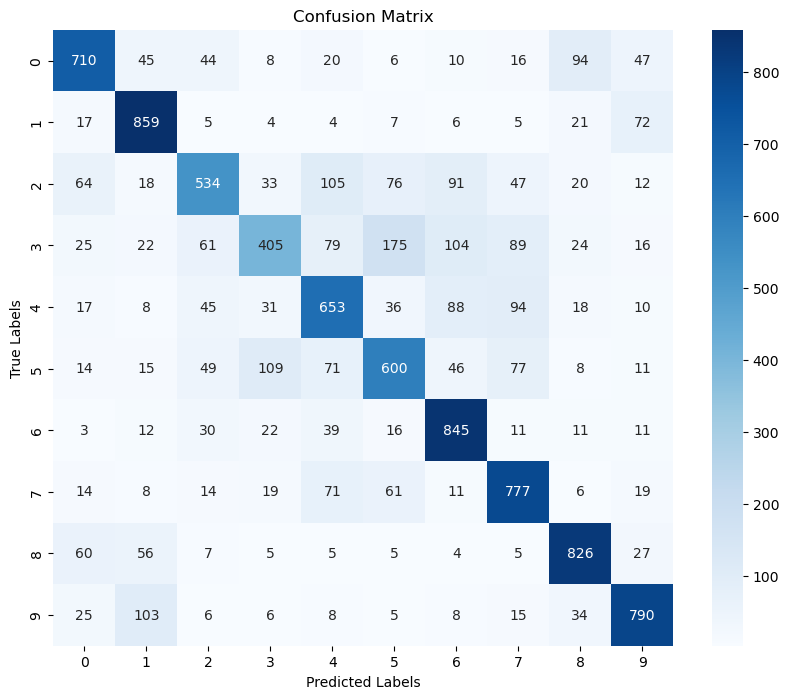


Classification Report:
               precision    recall  f1-score   support

    airplane       0.75      0.71      0.73      1000
  automobile       0.75      0.86      0.80      1000
        bird       0.67      0.53      0.59      1000
         cat       0.63      0.41      0.49      1000
        deer       0.62      0.65      0.64      1000
         dog       0.61      0.60      0.60      1000
        frog       0.70      0.84      0.76      1000
       horse       0.68      0.78      0.73      1000
        ship       0.78      0.83      0.80      1000
       truck       0.78      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']))

model.save('cnn_cifar10_model.h5')